In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [2, 2]

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
fm = fashion_mnist.load_data()

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
print('Training data shape:', train_images.shape)
print('Training labels shape:', train_labels.shape)
print('Testing data shape:', test_images.shape)
print('Testing labels shape:', test_labels.shape)
print('Labels:', np.unique(train_labels))

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)
Labels: [0 1 2 3 4 5 6 7 8 9]


9


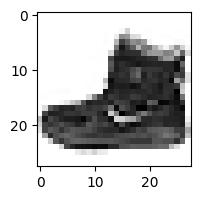

In [4]:
# example of data
print(train_labels[0])
plt.imshow(train_images[0], cmap='Greys');

In [5]:
# normalize the pixel values of the train and test images
train_images = train_images / 255.0
test_images = test_images / 255.0

hidden layer:<br/>
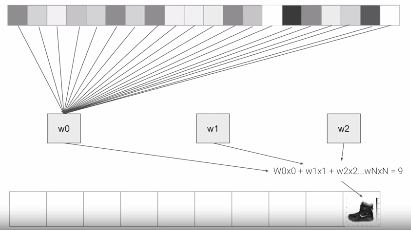

In [6]:
# create callback
class myCallback(tf.keras.callbacks.Callback):
  '''Halts the training after reaching 90% accuracy'''
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
    # if (logs.get('loss') < 0.4):
    #   print('\nLoss is low enough so cancelling training!')
    #   self.model.stop_training = True

In [7]:
# model = tf.keras.models.Sequential([
#     keras.layers.Flatten(input_shape=(28,28)), # flatten takes 28x28 square and turns it into a simple linear array
#     keras.layers.Dense(128, activation=tf.nn.relu), # hidden layer
#     keras.layers.Dense(10, activation=tf.nn.softmax)  # we have 10 classes of clothing
# ])

def train_mnist(x_train, y_train):
    # instantiate callback
    callbacks = myCallback()

    # define model
    model = tf.keras.models.Sequential([
        keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
        # 64 3x3 filters with relu activation (no negative values); (28, 28, 1) because for color depth single byte is used
        # under the hood tf is trying different filters on the image and learning which ones work when looking at the training data.
        keras.layers.MaxPooling2D(2,2), # max pooling takes the maximum value out of each 4 pixels
        # keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
        # keras.layers.MaxPooling2D(2,2),

        keras.layers.Flatten(), # flatten takes nxn square and turns it into a simple linear array
        keras.layers.Dense(128, activation=tf.nn.relu), # hidden layer
        keras.layers.Dense(10, activation=tf.nn.softmax)  # we have 10 classes of clothing
    ])

    # compile model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # train model
    model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

    return model



In [8]:
# train model without convolution layers
model = train_mnist(train_images, train_labels)

Epoch 1/10
1875/1875 [==============================] - 89s 46ms/step - loss: 0.3795 - accuracy: 0.8634
Epoch 2/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2557 - accuracy: 0.9072
Epoch 3/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.2109 - accuracy: 0.9222
Epoch 4/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.1769 - accuracy: 0.9351
Epoch 5/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1465 - accuracy: 0.9459
Epoch 6/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.1249 - accuracy: 0.9537
Epoch 7/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1042 - accuracy: 0.9621
Epoch 8/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0856 - accuracy: 0.9680
Epoch 9/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0702 - accuracy: 0.9744
Epoch 10/10
1875/1875 [==============================] - 76s 40m

In [ ]:
  # train model with 2 convolution layers
model = train_mnist(train_images, train_labels)

Epoch 1/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.4317 - accuracy: 0.8447
Epoch 2/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.2926 - accuracy: 0.8921
Epoch 3/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.2491 - accuracy: 0.9084
Epoch 4/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.2165 - accuracy: 0.9185
Epoch 5/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.1917 - accuracy: 0.9277
Epoch 6/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.1691 - accuracy: 0.9367
Epoch 7/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.1485 - accuracy: 0.9442
Epoch 8/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.1320 - accuracy: 0.9498
Epoch 9/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.1137 - accuracy: 0.9572
Epoch 10/10
1875/1875 [==============================] - 

In [ ]:
# train model with 1 convolution layer
model = train_mnist(train_images, train_labels)

Epoch 1/10
1875/1875 [==============================] - 78s 41ms/step - loss: 0.3811 - accuracy: 0.8640
Epoch 2/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2558 - accuracy: 0.9068
Epoch 3/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2100 - accuracy: 0.9228
Epoch 4/10
1875/1875 [==============================] - 82s 43ms/step - loss: 0.1757 - accuracy: 0.9362
Epoch 5/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1508 - accuracy: 0.9441
Epoch 6/10
1875/1875 [==============================] - 72s 39ms/step - loss: 0.1255 - accuracy: 0.9524
Epoch 7/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1052 - accuracy: 0.9607
Epoch 8/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0880 - accuracy: 0.9682
Epoch 9/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0730 - accuracy: 0.9726
Epoch 10/10
1875/1875 [==============================] - 71s 38m

In [ ]:
# evaluate model
test_loss= model.evaluate(test_images, test_labels)
test_loss

313/313 [==============================] - 6s 17ms/step - loss: 0.3582 - accuracy: 0.9093


[0.35822710394859314, 0.9093000292778015]

# Visualizing the Convolutions and Pooling

In [ ]:
# analyzing convolution and pooling
tf.keras.models.Sequential([
        keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation=tf.nn.relu), # hidden layer
        keras.layers.Dense(10, activation=tf.nn.softmax)  # we have 10 classes of clothing
    ]).summary()
# 1st conv2d 26x26 because our filter is 3x3 and it cuts off 2px on each dimension
# 1st maxpooling2d reduces that 26x26 to 13x13
# as a result of 2 convolutions and pooling instead of 1 28x28 image we have 64 5x5 images !
# that's why flatten layer takes in 5x5x64=1600 elements instead of 28x28=784

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [ ]:
print(test_labels[:30])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]


1/1 [==============================] - 0s 37ms/step


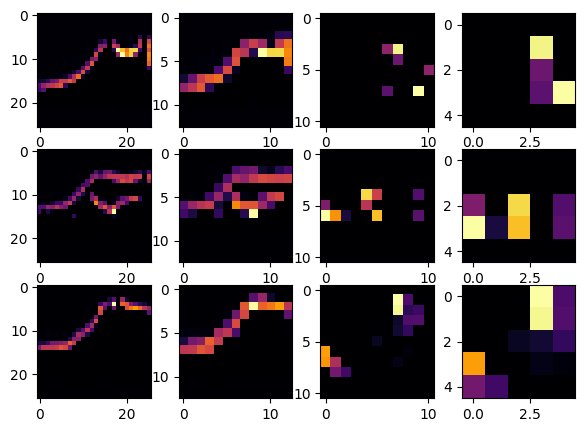

In [ ]:
model = tf.keras.models.Sequential([
        keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
])

plt.rcParams['figure.figsize'] = [7, 5]
f, axarr = plt.subplots(3, 4)

IMAGE_1 = 0
IMAGE_2 = 23
IMAGE_3 = 28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0, 4):
  f1 = activation_model.predict(test_images[IMAGE_1].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[IMAGE_2].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[IMAGE_3].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

